In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
print("number of training examples = {}, image rows = {}, image columns = {} and image channels = {}".format(num_train, img_rows, img_cols, img_channels))
num_test, _, _, _ =  test_features.shape
print("number of test examples = {}".format(num_test))
num_classes = len(np.unique(train_labels))
print("total number of unique classes are {} = ".format(num_classes))

170500096/170498071 [==============================] - 11s 0us/step
number of training examples = 50000, image rows = 32, image columns = 32 and image channels = 3
number of test examples = 10000
total number of unique classes are 10 = 


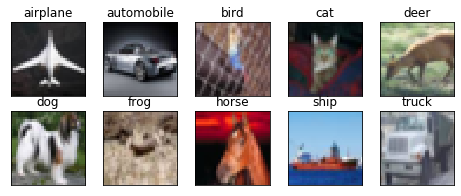

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##### Here the model architecture is little different from the assignment-6A model. The reason behind the change is in the previous architecture the dimension of the last layer was 4x4. Which is very less for applying the Grad-CAM operation. So, in the architecture below the dimension is 6x6.

In [9]:
# Defining the model again based on the given instructions
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005), input_shape=(32, 32, 3))) # 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 16


model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 8


model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(256, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, 3, 3, kernel_regularizer=l2(0.0005))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(128, 1, 1, kernel_regularizer=l2(0.0005))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, 1, kernel_regularizer=l2(0.0005))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 1, 1, kernel_regularizer=l2(0.0005))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(10, 6, 6, kernel_regularizer=l2(0.0005))) # 1
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `C

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 52s 134ms/step - loss: 2.7460 - acc: 0.2086 - val_loss: 2.6388 - val_acc: 0.2562
Epoch 2/100
390/390 [==============================] - 48s 123ms/step - loss: 2.2678 - acc: 0.3241 - val_loss: 2.5127 - val_acc: 0.2284
Epoch 3/100
390/390 [==============================] - 48s 122ms/step - loss: 1.8476 - acc: 0.4478 - val_loss: 2.1469 - val_acc: 0.3399
Epoch 4/100
390/390 [==============================] - 48s 122ms/step - loss: 1.4506 - acc: 0.5736 - val_loss: 2.0473 - val_acc: 0.3962
Epoch 5/100
390/390 [==============================] - 48s 122ms/step - loss: 1.3209 - acc: 0.6227 - val_loss: 1.9016 - val_acc: 0.4815
Epoch 6/100
390/390 [==============================] - 48s 122ms/step - loss: 1.2488 - acc: 0.6494 - val_loss: 1.4235 - val_acc: 0.6019
Epoch 7/100
390/390 [==============================] - 48s 122ms/step - loss: 1.2002 - acc: 0.6670 - val_loss: 1.4623 - val_acc: 0.5890
Epoch 8/100
390/390 [===========================

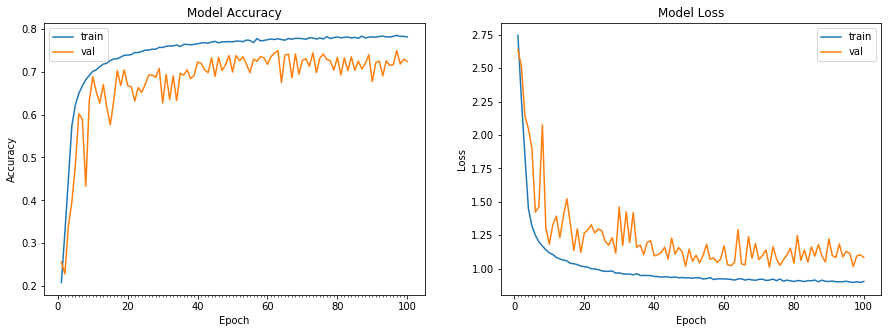

Accuracy on test data is: 72.41


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Now the Grad-CAM steps

In [0]:
# importing libraries
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import os
from skimage import io
from google.colab.patches import cv2_imshow

In [0]:
# url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRV3NaQEyDrdCo_7uY9g6nDYMEGNxDqaUkDVRUy1m05h8eDsdRfvg&s" #@param {type:"string"}
# img = io.imread(url) 

In [0]:
images = [test_features[103], test_features[109], test_features[112], test_features[113]]

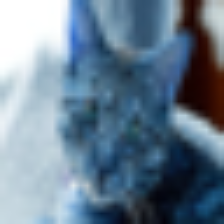

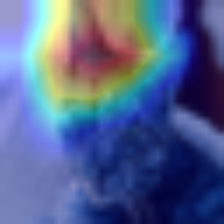

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


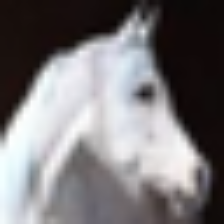

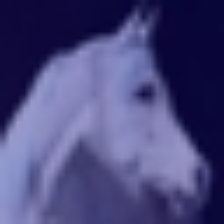

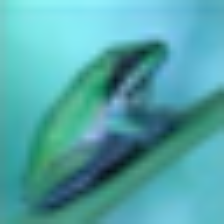

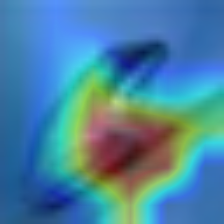

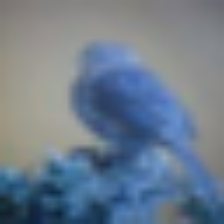

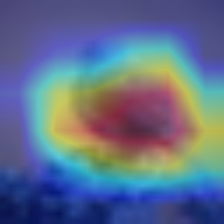

In [0]:
for img in images:
  # pre-processing for the images
  x = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(x)
  x = np.expand_dims(x,axis=0)    # Since we are passing only one image through the network, it’s required to expand the first dimension noting it as a batch of size 1

  # predicting the output of the image
  preds = model.predict(x)    # predicting the output on the trained model
  class_idx = np.argmax(preds[0])   # index for the predicted class
  class_output = model.output[:, class_idx]   # output from the model in tensor form, which will be used for calculating gradient for gradcam

  # selecting the layer whose features will be used for gradient calculation
  last_conv_layer = model.layers[-8]

  # calculating the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(32):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # visualizing the heatmap along with the original image
  img = (img * 255).round().astype(np.uint8)
  img = cv2.resize(img, (224, 224))
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)



### Now training the same model with cutout augmentation

In [0]:
# defining the preprocessing function for cutout data augmentation
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 52s 132ms/step - loss: 2.7675 - acc: 0.1251 - val_loss: 5.2472 - val_acc: 0.1169
Epoch 2/100
390/390 [==============================] - 48s 123ms/step - loss: 2.2433 - acc: 0.2964 - val_loss: 2.1405 - val_acc: 0.3531
Epoch 3/100
390/390 [==============================] - 48s 123ms/step - loss: 1.5803 - acc: 0.5197 - val_loss: 1.7212 - val_acc: 0.4487
Epoch 4/100
390/390 [==============================] - 48s 123ms/step - loss: 1.2842 - acc: 0.6242 - val_loss: 1.7506 - val_acc: 0.4570
Epoch 5/100
390/390 [==============================] - 48s 123ms/step - loss: 1.1517 - acc: 0.6724 - val_loss: 1.4934 - val_acc: 0.5527
Epoch 6/100
390/390 [==============================] - 48s 123ms/step - loss: 1.0734 - acc: 0.7027 - val_loss: 1.5570 - val_acc: 0.5551
Epoch 7/100
390/390 [==============================] - 48s 123ms/step - loss: 1.0248 - acc: 0.7243 - val_loss: 1.3735 - val_acc: 0.6175
Epoch 8/100
390/390 [===========================

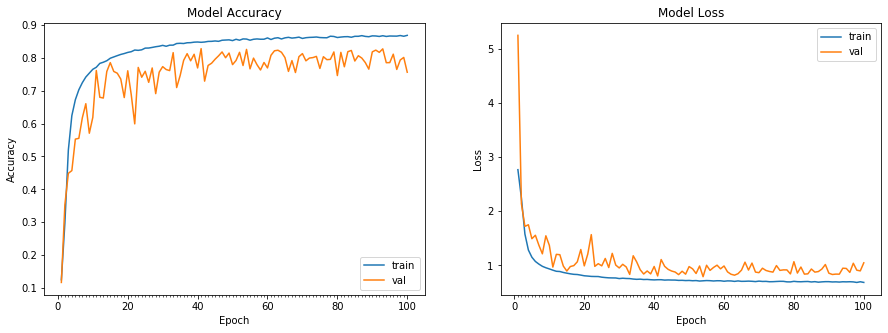

Accuracy on test data is: 75.61


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,
                            #  preprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,v_l=0, v_h=255, pixel_level=False),
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

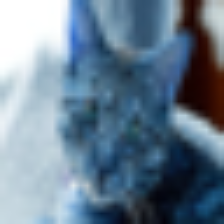

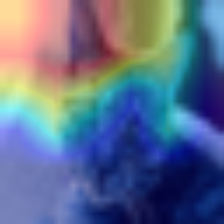

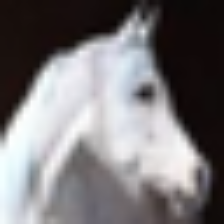

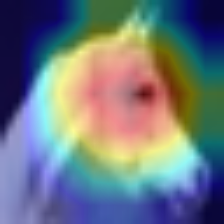

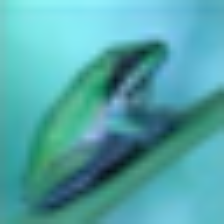

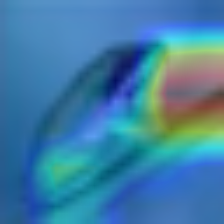

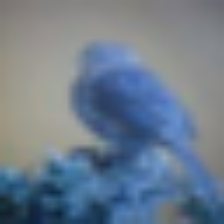

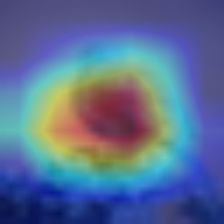

In [15]:
# Now applying Grad-CAM on the same images using the new trained model with cutout augmentation
for img in images:
  # pre-processing for the images
  x = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(x)
  x = np.expand_dims(x,axis=0)    # Since we are passing only one image through the network, it’s required to expand the first dimension noting it as a batch of size 1

  # predicting the output of the image
  preds = model.predict(x)    # predicting the output on the trained model
  class_idx = np.argmax(preds[0])   # index for the predicted class
  class_output = model.output[:, class_idx]   # output from the model in tensor form, which will be used for calculating gradient for gradcam

  # selecting the layer whose features will be used for gradient calculation
  last_conv_layer = model.layers[-8]

  # calculating the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(32):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # visualizing the heatmap along with the original image
  img = (img * 255).round().astype(np.uint8)
  img = cv2.resize(img, (224, 224))
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)